# JAM FITTER

In [1]:
import sys,os
from fitlab.resman import RESMAN
from fitlab.mcsamp import MCSAMP
from tools.config import load_config,conf
from tools.tools import load, save,checkdir
import pylab as py
import numpy as np
import pandas as pd
import copy

import matplotlib.pyplot as plt

def lprint(msg):
    sys.stdout.write('\r')
    sys.stdout.write('%s' %msg)
    sys.stdout.flush()
%matplotlib inline

## setup path to store the results 

In [2]:
path2results='sia_collins'
checkdir(path2results)

## data sets 

In [3]:
conf['datasets']={}

## SIA

In [4]:
conf['datasets']['sia']={}
conf['datasets']['sia']['filters']={0:{'idx':None,'filter':None}}
conf['datasets']['sia']['filters'][0]['idx']=[1000,1001,1002,1003,1004,1005]
conf['datasets']['sia']['filters'][0]['filter']="Q2>1.69"
conf['datasets']['sia']['xlsx']={}
conf["datasets"]["sia"]["xlsx"][1000]="sia/expdata/1000.xlsx"  
conf["datasets"]["sia"]["xlsx"][1001]="sia/expdata/1001.xlsx"  
conf["datasets"]["sia"]["xlsx"][1002]="sia/expdata/1002.xlsx"  
conf["datasets"]["sia"]["xlsx"][1003]="sia/expdata/1003.xlsx"  
conf["datasets"]["sia"]["xlsx"][1004]="sia/expdata/1004.xlsx"  
conf["datasets"]["sia"]["xlsx"][1005]="sia/expdata/1005.xlsx"  
conf['datasets']['sia']['norm']={}
for k in conf['datasets']['sia']['xlsx']: 
    conf['datasets']['sia']['norm'][k]={'value':1,'fixed':True,'min':0,'max':1} 

## parameters

In [5]:
conf['params']={}
conf['shape']=1

### TMD PDF/FF parameters (from upol analysis)

In [6]:
conf['params']={}
conf['params']['pdf']={}
conf['params']['pdf']['widths0 valence']  = {'value':5.89294556274006398056e-01,'fixed':True,'min':0,'max':1}
conf['params']['pdf']['widths0 sea']      = {'value':6.33443286558464269120e-01,'fixed':True,'min':0,'max':1}
conf['params']['ff']={}
conf['params']['ff']['widths0 pi+ fav']   = {'value':1.15920500644793311729e-01,'fixed':True,'min':0,'max':1}
conf['params']['ff']['widths0 pi+ unfav'] = {'value':1.39782079427820671302e-01,'fixed':True,'min':0,'max':1}

### TMD Collins parameters

In [7]:
conf['params']['collins']={}
conf['params']['collins']['widths0 pi+ fav']     = {'value':0.5,'fixed':False,'min':1e-5,'max':1}
conf['params']['collins']['widths0 pi+ unfav']   = {'value':0.5,'fixed':False,'min':1e-5,'max':2}
conf['params']['collins']['pi+ u N 1']  = {'value': 1.0,'fixed':False,'min':0,'max':20}
conf['params']['collins']['pi+ u a 1']  = {'value':-0.5,'fixed':False,'min':-1,'max':5}
conf['params']['collins']['pi+ u b 1']  = {'value': 3.0,'fixed':False,'min':1e-5,'max':10}
conf['params']['collins']['pi+ d N 1']  = {'value': 1.0,'fixed':False,'min':-20,'max':0}
conf['params']['collins']['pi+ d a 1']  = {'value':-0.5,'fixed':False,'min':-1,'max':5}
conf['params']['collins']['pi+ d b 1']  = {'value': 3.0,'fixed':False,'min':1e-5,'max':10}
conf['params']['collins']['pi+ u c 1']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ d c 1']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ u d 1']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ d d 1']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}

conf['params']['collins']['pi+ u N 2']  = {'value': 1.0,'fixed':False,'min':0,'max':20}
conf['params']['collins']['pi+ u a 2']  = {'value': 0.5,'fixed':False,'min':-1,'max':5}
conf['params']['collins']['pi+ u b 2']  = {'value': 1.0,'fixed':False,'min':1e-5,'max':10}
conf['params']['collins']['pi+ d N 2']  = {'value': 0.0,'fixed':True,'min':-20,'max':0}
conf['params']['collins']['pi+ d a 2']  = {'value': 0.0,'fixed':True,'min':-1,'max':5}
conf['params']['collins']['pi+ d b 2']  = {'value': 0.0,'fixed':True,'min':1e-5,'max':10}
conf['params']['collins']['pi+ u c 2']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ d c 2']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ u d 2']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ d d 2']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}

## Nested Sampling

### initialize fitpack libraries

In [8]:
conf['ncpus']=1
conf['resman'] = RESMAN()
mcsamp=MCSAMP()

loading sia data sets 1005
multiprocess setup: ncpus=1 / observable


### start multiple NS runs
- the code will start n independent runs specified by size

In [9]:
conf['size']=4
conf['factor']=3
mcsamp.run(path2results,factor=2,size=4)

iter=2717  logz=-14.844 rel-err=9.982e-11  t-elapsed=8.511e+03  dchi2min=1.435e+01 dchi2max=1.435e+01

### combine multiple runs into one big run

In [10]:
MC=mcsamp.get_MC_samples(path2results+'/mcdata')

runs max likelihoods
7.17551073533
-28.6426019235
-25.5489524409
-27.2634162134
sample  size= 10831
sample2 size= 937


### distribution of parameters

     widths0 pi+ fav =    0.07630 +/-    0.00206
   widths0 pi+ unfav =    1.48800 +/-    0.25512
           pi+ u N 1 =    8.05498 +/-    1.62183
           pi+ u a 1 =    2.45536 +/-    1.22262
           pi+ u b 1 =    3.45597 +/-    1.44215
           pi+ d N 1 =  -10.70414 +/-    3.68777
           pi+ d a 1 =   -0.35251 +/-    0.25476
           pi+ d b 1 =    6.54500 +/-    0.90312
           pi+ u N 2 =   12.86959 +/-    3.41362
           pi+ u a 2 =    0.07268 +/-    1.19139
           pi+ u b 2 =    7.39709 +/-    1.74490


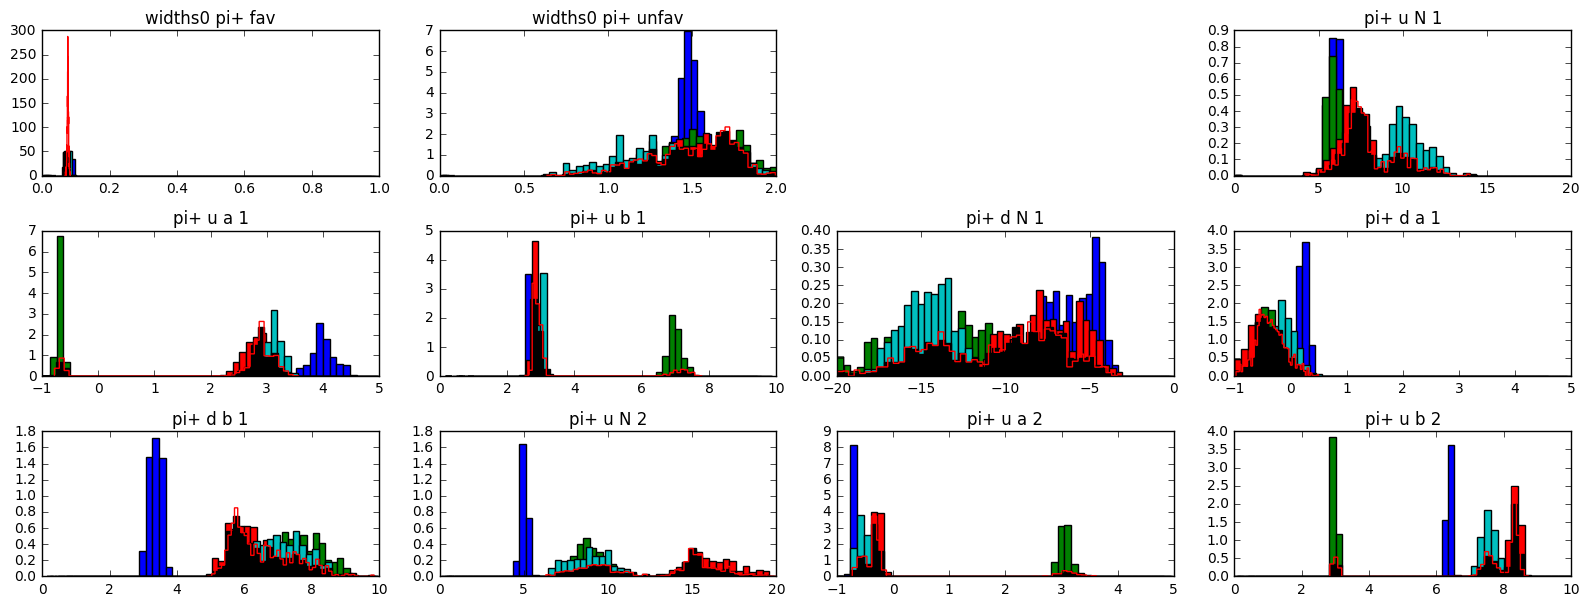

In [11]:
samples=MC['samples']
samples2=MC['samples2']
weights=MC['weights']
weights2=MC['weights2']
order=MC['order']
runs=MC['runs']

nrows,ncols=10,4
fig = py.figure(figsize=(ncols*4,nrows*2))

def get_idx(key,tag):
    for i in range(len(order)):
        if order[i][1]==key and order[i][2]==tag:
            return i

global cnt
cnt=0
def plot(tags):
    global cnt
    for i in range(1,len(tags)):
        cnt+=1
        if tags[i]==None: continue
        idx=get_idx(tags[0],tags[i])
        ax=py.subplot(nrows,ncols,cnt)
        vmin=np.amin(samples2.T[idx])
        vmax=np.amax(samples2.T[idx])
        R=None#(vmin,vmax)
        for k in runs:
            ax.hist(runs[k]['samples'].T[idx],weights=runs[k]['weights'],bins=50,normed=True,range=R)
        ax.hist(samples.T[idx],weights=weights,bins=50,color='k',normed=True,range=R)
        ax.hist(samples2.T[idx],weights=weights2,bins=50,color='r',histtype='step',normed=True,range=R)
        ax.set_title(tags[i])
        mean=np.einsum('i,i',samples2.T[idx],weights2)
        std=np.einsum('i,i',(samples2.T[idx]-mean)**2,weights2)**0.5
        print '%20s = %10.5f +/- %10.5f'%(tags[i],mean,std)
        #ax.set_xlim(vmin,vmax)
    py.tight_layout()

plot(['collins','widths0 pi+ fav','widths0 pi+ unfav',None])
plot(['collins','pi+ u N 1','pi+ u a 1','pi+ u b 1'])
plot(['collins','pi+ d N 1','pi+ d a 1','pi+ d b 1'])
plot(['collins','pi+ u N 2','pi+ u a 2','pi+ u b 2'])

## data vs theory

In [12]:
data={'weights':MC['weights2']}
cnt=0
for s in MC['samples2']:
    cnt+=1    
    lprint('%d/%d'%(cnt,len(MC['samples2'])))  
    conf['resman'].get_residuals(s);
    for k in conf['resman'].siares.tabs:
        if k  not in data: data[k]=[]
        thy=conf['resman'].siares.tabs[k]['thy']    
        norm=conf['datasets']['sia']['norm'][k]['value']
        shift=conf['resman'].siares.tabs[k]['shift']        
        data[k].append(shift+thy/norm)
save(data,'%s/%s'%(path2results,'sia.dat'))   

937/937

### compute averages and collect results

In [13]:
data=load('%s/%s'%(path2results,'sia.dat'))   
for k in data: data[k]=np.array(data[k])
thy,dthy={},{}
for k in data:
    if k=='weights': continue
    thy[k]=np.einsum('i,ik->k',data['weights'],data[k])
    dthy[k]=np.einsum('i,ik->k',data['weights'],(data[k]-thy[k])**2)**0.5
for k in thy: 
    conf['resman'].siares.tabs[k]['thy']=copy.copy(thy[k])
    conf['resman'].siares.tabs[k]['dthy']=copy.copy(dthy[k])

In [14]:
report=conf['resman'].gen_report(verb=0,level=1)
delimiters=[]
for i in range(len(report)): 
    if 'reaction:' in report[i]: 
        delimiters.append(i) 

data={}
nlines=len(report)
for i in range(len(delimiters)):
    ini=delimiters[i]
    if i==len(delimiters)-1: fin=len(report)
    else: fin=delimiters[i+1]
    reaction=report[ini].replace('reaction:','').strip()
    data[reaction]={'raw data':report[ini:fin]}
    
for k in data:
    print k
    block=data[k]['raw data']
    isep=[i for i in range(len(block)) if '--------' in block[i]][0]
    data[k]['summary']=[block[i] for i in range(isep)]
    data[k]['tables']=[block[i] for i in range(isep+1,len(block))]

    tabs={}
    for l in data[k]['tables']:
        info=l.split(',')
        col=[s for s in info if 'col' in s][0].split('=')[1].strip()
        if col not in tabs: tabs[col]={}
        info=[[ss.strip() for ss in s.split('=')] for s in info if 'col' not in info  if s.strip()!='']
        
        for s in info:
            if s[0] not in tabs[col]: tabs[col][s[0]]=[]
        
        for s in info:
            try:
                value=float(s[1])
            except:
                value=s[1]
            tabs[col][s[0]].append(value)        

    data[k]['tabs']=tabs
save(data,'%s/%s'%(path2results,'data_and_thy.dat'))

sia


In [15]:
def summary():
    for k in data:
        print ""
        for l in data[k]['summary']: print l
summary()


reaction: sia
   1000      BaBaR     9       7.90       0.00       0.00
   1001      BaBaR     9       4.01       0.00       0.00
   1002      BaBaR    36      10.21       0.00       0.00
   1003      BaBaR    36      26.03       0.00       0.00
   1004      belle    16      13.92       0.00       0.00
   1005      belle    16      14.20       0.00       0.00


### plot data and theory

In [16]:
ALL=pd.concat([pd.DataFrame(conf['resman'].siares.tabs[idx]) \
              for idx in conf['resman'].siares.tabs.keys()])

ALL.columns

Index([          u'N',           u'Q',          u'Q2',     u'S2/1+C2',
           u'S2/1-C2',       u'Shift',       u'alpha',         u'col',
          u'dS2/1-C2',         u'dqT',        u'dthy',         u'dz1',
               u'dz2',     u'hadron1',     u'hadron2',         u'obs',
                u'pT',       u'pTmax',       u'pTmin',          u'qT',
       u'r-residuals',   u'residuals',       u'shift',      u'stat_u',
             u'sys_u',       u'syt_u',         u'thy',       u'value',
                u'z1',       u'z1max',       u'z1min',          u'z2',
             u'z2max',       u'z2min'],
      dtype='object')

In [17]:
data = {}
collaborations = np.unique(ALL.col)

for collab in collaborations:
    data[collab] = {}
    
    data_subset = ALL[ALL.col == collab]
    observables = np.unique(data_subset.obs)
    
    for observable in observables:        
        data[collab][observable] = data_subset[data_subset.obs == observable]        
        print('Collaboration: %s, Observerable: %s, Points: %d' % (collab, observable, len(data[collab][observable])))

Collaboration: BaBaR, Observerable: AUC-0-PT, Points: 9
Collaboration: BaBaR, Observerable: AUC-0-PT-INT, Points: 36
Collaboration: BaBaR, Observerable: AUL-0-PT, Points: 9
Collaboration: BaBaR, Observerable: AUL-0-PT-INT, Points: 36
Collaboration: belle, Observerable: AUC-0-PT-INT, Points: 16
Collaboration: belle, Observerable: AUL-0-PT-INT, Points: 16


In [18]:
# from the paper https://arxiv.org/pdf/1309.5278.pdf
z1_bins = np.array([0.15, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9])

In [19]:
def plot(data):

    n_col = 3
    n_row = len(z1_bins)/n_col + 1

    plt.figure(figsize=(4 *n_col, 3 *n_row))

    for index in range(len(z1_bins)-1):
        data_auc = data['AUC-0-PT-INT'].query('z1 > %f and z1 < %f' % (z1_bins[index], z1_bins[index+1]))
        data_aul = data['AUL-0-PT-INT'].query('z1 > %f and z1 < %f' % (z1_bins[index], z1_bins[index+1]))


        plt.subplot(n_row, n_col, index+1)
        plt.errorbar(data_auc.z2, data_auc.value, data_auc.alpha, 
                    marker='o', linestyle='', color='red', label='$A_{UC}$')
        plt.plot(data_auc.z2, data_auc.thy, linestyle='-', color='red')
        plt.fill_between(data_auc.z2, data_auc.thy-data_auc.dthy, data_auc.thy+data_auc.dthy,
                         color='black', alpha=0.8)


        plt.errorbar(data_aul.z2, data_aul.value, data_aul.alpha, 
                    marker='o', linestyle='', color='blue', label='$A_{UL}$')
        plt.plot(data_aul.z2, data_aul.thy, linestyle='-', color='blue')
        plt.fill_between(data_aul.z2, data_aul.thy-data_aul.dthy, data_aul.thy+data_aul.dthy, 
                         color='orange', alpha=0.8)
        
        plt.xlim([0.0, 1.0])
        plt.xlabel('$Z_2$')
        plt.title('$Z_1 \in [%.1f, %.1f]$' % (z1_bins[index], z1_bins[index+1]))
        
        # the legend has theory labels and I dont like them.
        if len(data_auc) > 0 and len(data_aul) > 0:
            handles, labels = plt.gca().get_legend_handles_labels()
            good_handles = []
            good_labels = []
            for handle, label in zip(handles, labels):
                if 'thy' not in label:
                    good_handles.append(handle)
                    good_labels.append(label)
            
            plt.legend(good_handles, good_labels, frameon=False, loc='topleft')
        
    plt.tight_layout()

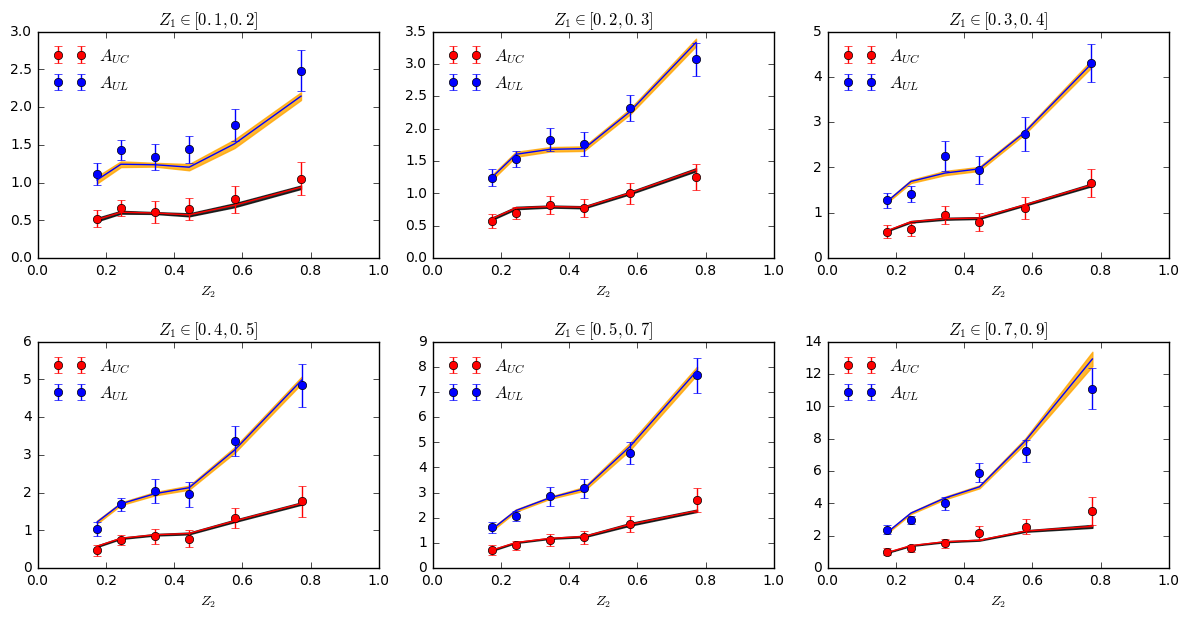

In [20]:
plot(data['BaBaR'])

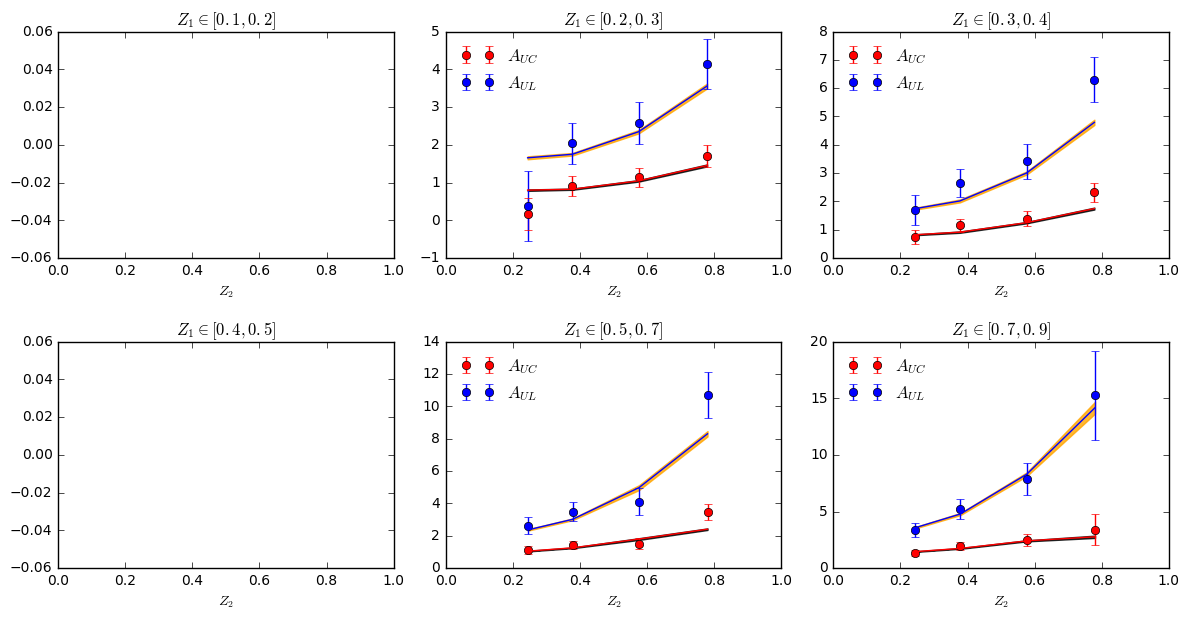

In [21]:
plot(data['belle'])

## PDFs and FFs

In [22]:
def calc(func):
    RAW=[]
    cnt=0
    for s in MC['samples2']:
        cnt+=1    
        lprint('%d/%d'%(cnt,len(MC['samples2'])))  
        conf['parman'].set_new_params(s);    
        RAW.append(func())
    RAW=np.array(RAW)
    f =np.einsum('k,kif->if',MC['weights2'],RAW)
    df=np.einsum('k,kif->if',MC['weights2'],(RAW-f)**2)**0.5
    f=np.einsum('if->fi',f)
    df=np.einsum('if->fi',df)
    return {'f':f,'df':df}

In [23]:
Z1=10**np.linspace(-3,-1)
Z2=np.linspace(0.01,0.999)
Z=np.append(Z1,Z2)
Hpi=calc(lambda : [conf['collins'].get_C(z,1,'pi+') for z in Z])

937/937

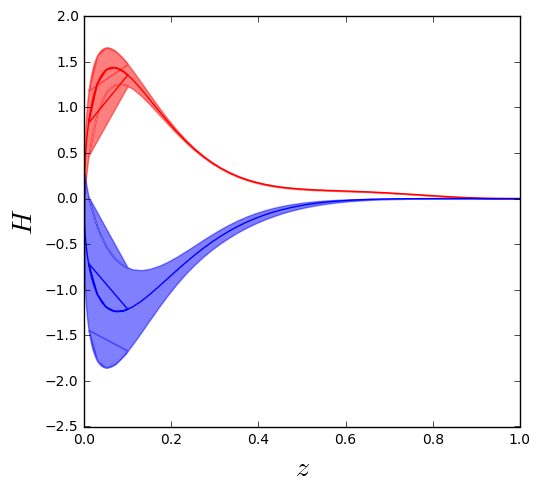

In [25]:
nrows,ncols=1,2
py.figure(figsize=(ncols*5,nrows*5))
ax=py.subplot(nrows,ncols,1)
ax.fill_between(Z,Z*(Hpi['f'][1]-Hpi['df'][1]),Z*(Hpi['f'][1]+Hpi['df'][1]),color='r',alpha=0.5)
ax.fill_between(Z,Z*(Hpi['f'][3]-Hpi['df'][3]),Z*(Hpi['f'][3]+Hpi['df'][3]),color='b',alpha=0.5)
ax.plot(Z,Z*Hpi['f'][1],'r')
ax.plot(Z,Z*Hpi['f'][3],'b')

ax.set_ylabel(r'$H$',size=20)
ax.set_xlabel(r'$z$',size=20)
ax.set_ylim(-2.5,2.0)
ax.set_xlim(0,1)


py.tight_layout()